<a href="https://colab.research.google.com/github/davidwan08/sales-predictions/blob/main/Food_Sales_Prediction_Project_Modeling_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project Name: Sales Prediction

# Name: David Wan

# Date: 04/27/2022

# **Project Overview**

- For this sales prediction project, I will be performing modeling and data analysis on sales data to understand the properties of products and outlets that play crucial roles in sales predictions.
- I will use visualizations of diagrams and models to make determinations from data on what will help us comprehend sales figures of certain items and boost overall sales based on types of products and outlets.

# **Library Imports**

- I will import a list of class objects from a wide array of libraries that will allow me to perform analysis.

In [ ]:
# Import libraries and classes into Python.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# **Data Loading & Data Overview**

- I will start by loading the dataset into Python from the file location.

In [ ]:
# Let's mount the data from Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports the csv file into filename.
filename = '/content/drive/MyDrive/Coding Dojo/Machine Learning/sales_predictions.csv'
# Use pandas to upload the file as a dataframe.
df = pd.read_csv(filename)
# Reads the first 5 rows of data using head().
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Let's get an overview of the dataset.

In [ ]:
# Summarizes the rows and columns of the dataset using the info code.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- There are a total of 8523 rows and 12 columns based on the results of the code.
- Let's also check for any potential missing or duplicated values in the dataset.

In [ ]:
# Check for duplicate entries in the dataset.
df.duplicated().sum()

0

- So far, no duplicate entries have been discovered.
- In case there are duplicate entries, we can use the following code "df.drop_duplicates(inPlace = True)" to drop any duplicate entries from the dataset.
- Looks like we have columns with missing values! Let's examine where our missing values are located at.

In [ ]:
# Checks for missing values in the dataset.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- So far, we see 1463 missing values in the Item_Weight column and 2410 missing values from the Outlet_Size column.

# **Data Cleaning & Imputation for Visualization Preparation**

- For the purpose of data cleaning, I will be making a copy of the dataset named df_cleaning for cleaning purposes only.

In [ ]:
# Copies original DataFrame into the new modified DataFrame df_clean for further analysis.
df_cleaning = df.copy(deep=True)
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- For item weight, I believe the best way to resolve this issue would be to take the average weights. That way, I would use them as the weight values.
- However, I cannot assume that the average values work for all missing fields, as every item is different! Therefore, I will explore options for doing so.
- Let's see what the item weight column averages are based on item type.

In [ ]:
# Summarizes the item weight column averages based on item type grouping.
df_cleaning.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

- It definitely looks like the differences are pretty subtle or insignificant among the item types.
- Therefore, I believe it should be safe to replace missing weights with the average value.
- That should eliminate the missing value issues associated with item weights.

In [ ]:
# Obtain the mean weight value for the Item_Weight column.
weight_mean = df_cleaning['Item_Weight'].mean()

# Fills the missing values with the mean item weight value.
df_cleaning['Item_Weight'].fillna(weight_mean, inplace=True)

In [ ]:
# Checks for any further missing values in the dataset.
df_cleaning.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- For the outlet size, let's examine the value counts involved with it.

In [ ]:
# Check the values of the Outlet_Size column.
df_cleaning['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- As an idea, let's see how the other columns can correlate to outlet sizes.

In [ ]:
# Attempting to examine how other columns can correlate to outlet sizes.
print(df_cleaning['Outlet_Location_Type'].unique())
print(df_cleaning['Outlet_Type'].unique())
print(df_cleaning['Outlet_Identifier'].unique())

['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


- I don't think there is any way I would be able to infer outlet size based on this data.
- Additionally, I do not believe that outlet size by itself has significance in overall sales.
- What does small, medium, and high really represent?
- I believe that the Outlet_Type provides a much better indicator that Outlet_Size, despite the vagueness of type.
- Therefore, dropping the Outlet_Type column would be a better idea to make more relevant predictions.

In [ ]:
# Let's drop the Outlet_Size column from the dataset.
df_cleaning = df_cleaning.drop(columns = ['Outlet_Size'])
df_cleaning.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


- We have updated the dataset as a result of dropping the column.
- Let's confirm that there are no more missing values left to address.

In [ ]:
# Checks the dataframe for any further missing values.
df_cleaning.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- No more missing values in the dataset!
- Let's check each categorical column to see what values are in each one.
- First, lets store the datatypes as data_types.

In [ ]:
# Store the datatypes of the dataset.
data_types = df_cleaning.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Next, lets store all column types of type 'object' into str_cols.

In [ ]:
# Store all columns that have datatype as object.
str_cols = data_types[data_types=="object"]
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

- Let's get an index of values in the object columns, then view those columns as a result.

In [ ]:
# Obtain the str_cols index.
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# View only columns with object Data Type.
df_cleaning[str_cols.index]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2


- Now let's perform an iteration of what values show up in those categorical columns.

In [ ]:
# Save just index of str_cols.
str_cols = str_cols.index

In [ ]:
# Iterate through all object columns to examine values in the columns.
for col in str_cols:
  print(f"{col}:")
  print(df_cleaning[col].value_counts(dropna=False))
  print("\n\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

- Looks like item fat content is the only column that needs all values adjusted for consistency.
- Let us change the values to have just Low Fat and Regular.

In [ ]:
# Shows the values for Item_Fat_Content column along with the counts.
df_cleaning['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- Let's go ahead and standardize the values in that column.

In [ ]:
# Standardize the values in the Item_Fat_Content column.
df_cleaning['Item_Fat_Content'] = df_cleaning['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')
df_cleaning['Item_Fat_Content'] = df_cleaning['Item_Fat_Content'].replace('reg', 'Regular')
# Verify the values in the column to ensure that the column has standardized values.
df_cleaning['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Notice that Low Fat sum: 5089 + 316 + 112 = 5517.
- Notice that Regular sum: 2889 + 117 = 3006.
- To finalize the cleaning and imputation process of this dataset, let's obtain the statistical results for the numerical columns.

In [ ]:
# Use describe code to obtain summary stats for all numerical columns.
df_cleaning.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Rounds the summary values to the nearest hundreth place for cleanliness.
df_cleaning.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


- The statistical information looks normal to me. I don't really see anything out of the ordinary there.
- Now the dataset has been cleaned and all missing values imputed!
- We will go ahead and make a copy of the dataframe to be named df_clean.

In [ ]:
# Make a copy of the cleaned dataframe into df_clean.
df_clean = df_cleaning.copy(deep=True)
# Get an overview of the cleaned dataset.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


# **Data Visualization**

- Now that the data has been successfully cleaned, we are now ready to make our visualizations on the cleaned data to see how sales numbers correlate to certain features and what the distribution of item and outlet sales look like!
- Let's check what data we have to work with based on datatypes.

In [ ]:
# Lets examine the data types using dtypes.
data_types = df_clean.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Next, lets separate the columns based on the data types.
- Let's start by creating a list of columns with object data types. These columns will be handled as categorical data for visualization purposes.

In [ ]:
# Create a dataframe of columns with object datatype.
string_columns = data_types[data_types == "object"]
string_columns

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

- Let's also create a list of columsn with numerical data types. These columns will be handled as numerical data for visualization purposes.
- Pretty much any column with datatype other than object would fall into this category.

In [ ]:
# Create a dataframe of columns with number datatype.
number_columns = data_types[data_types != "object"]
number_columns

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

## **Creating a Histogram**

- For my histogram, I would like to generate one that details the item MRP across the board.
- Hopefully that should generate some understanding as to how much the items sales are valued.
- I want to try Seaborn style just to see how it looks!
- Bins is set to 50 to improve the visualization quality of the bars.
- X value rotation is set at 30 degrees.
- I adjusted the font of title and label values for legibility.
- I wish I could tinker with more settings, but my creativity can only take me so far.....


Text(0, 0.5, 'Number of Items')

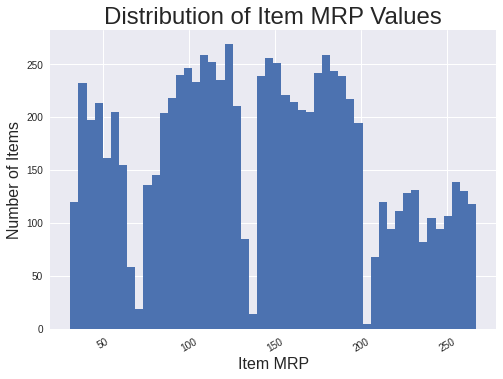

In [ ]:
# Lets go ahead and create a histogram plotting the MRP of items sold.
plt.style.use('seaborn')
df_clean['Item_MRP'].hist(bins = 50)
plt.xticks(rotation = 30)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Distribution of Item MRP Values', fontsize = 24)
plt.xlabel('Item MRP', fontsize = 16)
plt.ylabel('Number of Items', fontsize = 16)

- Based on what I have observed from the histogram, it seems like the Item MRP values are somewhat evenly distributed across the board, ranging from about 20 to around 270. 
- However, there seems to be separate clusters of MRP values centered around certain values, indicating that certain categories of items may have similar MRP values depending on item type. 
- Also, it seems like the MRP of items favors certain price ranges and disfavors others. 
- For example, not a lot of items are priced at 200-210ish range. This may indicate that items were much more favorable to be priced at 190-200ish. The 199.99 effect may play a role as well in terms of consumer psychology? (Pretty much making the item seem like it costs less than what it actually is.)

## **Creating a Boxplot for Item MRP Value Based on Item Fat Content**

- For my boxplot, I do want to examine how the item fat content plays a role in the Item MRP value. 
- Are reduced fat products more expensive in general than regular fat products? Hopefully the boxplot will answer that question.
- Lets create a couple of filters that will help us sort the data.
- First, lets examine what values reside in the Item Fat Content column. There should be only 2 values in that column: Low Fat and Regular.

In [ ]:
# Check the unique values of the Item_Fat_Content column.
df_clean['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

- Let's go ahead and create a couple of filters: one for Low Fat and one for Regular.

In [ ]:
# Creates a filter for Low Fat.
lowfat_filter = df_clean['Item_Fat_Content'] == 'Low Fat'
lowfat_filter.head()

0     True
1    False
2     True
3    False
4     True
Name: Item_Fat_Content, dtype: bool

In [ ]:
# Creates a filter for Regular, only with the ~ symbol.
# What is not lowfat is considered regular.
regular_filter = ~lowfat_filter
regular_filter.head()

0    False
1     True
2    False
3     True
4    False
Name: Item_Fat_Content, dtype: bool

- Lets create a new DataFrame named df_lowfat containing Low Fat items.

In [ ]:
# Create the dataframe with Low Fat for Item_Fat_Content column.
df_lowfat = df_clean.loc[lowfat_filter, :]
df_lowfat.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
10,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266


- Lets also create another new DataFrame named df_regular containing Regular items.

In [ ]:
# Create the dataframe with Regular for Item_Fat_Content column.
df_regular = df_clean.loc[regular_filter, :]
df_regular.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986


- Now that we have the data separated by item fat content values, lets use the dataframes to create our boxplots!
- I went ahead and used most of the same styles as the histogram.
- These boxplots will plot the MRP values of items based on item fat content.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Item MRP')

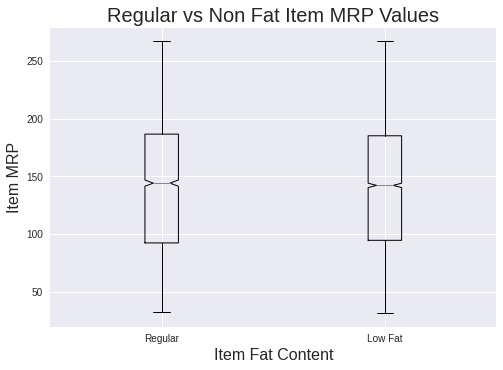

In [ ]:
# Create the histogram plotting the MRP values based on item fat content.
plt.style.use('seaborn')
lowfat = df_lowfat['Item_MRP']
regular = df_regular['Item_MRP']
plt.boxplot([regular,lowfat], notch = True, labels=['Regular', 'Low Fat']);
plt.title('Regular vs Non Fat Item MRP Values', fontsize = 20)
plt.xlabel('Item Fat Content', fontsize = 16)
plt.ylabel('Item MRP', fontsize = 16)

- Based on my observations with the histogram comparing the Item MRP values of regular vs nonfat items, it doesnt appear as though there was any discrepancies in the Item MRP for both categories!
- In addition, it looks as though the boxplot distributions of both item fat content categories are almost identical to each other. 
- Therefore, based on the overlap of the notches, we CANNOT conclude with a 95% confidence interval that the item fat content makes any significant difference in the distribution of Item MRP values.
- Just to confirm that my observations about the boxplot visualization are correct, I will check the descriptive summaries of the Item MRP values for both Low Fat and Regular items.

In [ ]:
# Show descriptive statistics of Item_MRP column for the lowfat dataframe.
# The median is set at around 142.
df_lowfat['Item_MRP'].describe()

count    5517.000000
mean      140.714098
std        62.311756
min        31.290000
25%        94.477800
50%       142.081200
75%       185.089800
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
# Show descriptive statistics of Item_MRP column for the regular dataframe.
# The median is set at around 144.
df_regular['Item_MRP'].describe()

count    3006.000000
mean      141.504259
std        62.214786
min        32.055800
25%        92.221200
50%       144.044400
75%       186.521400
max       266.888400
Name: Item_MRP, dtype: float64

- Overall, the data summarization sets for both lowfat and regular items confirm my aforementioned conclusions.

## **Creating a Correlation Heatmap**

- Let us see the heatmap to determine if there are any correlations in the dataset that would be of significance in our data analysis.
- First, we need to obtain our correlation values of the dataset.

In [ ]:
# Save the correlation information under corr.
corr = df_clean.corr()
corr.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


- Now that we have our correlation values, let's check the heatmap and see where the correlation values lie.

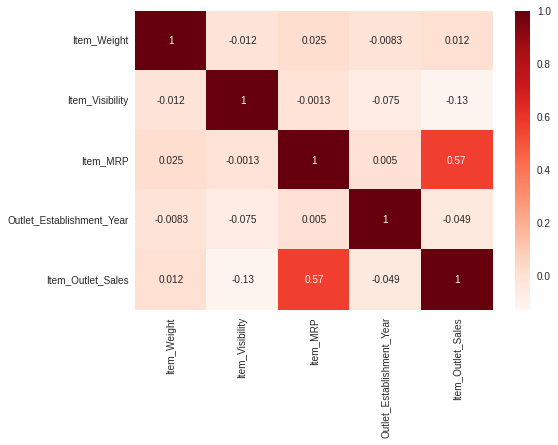

In [ ]:
# Use the stored correlation values to generate the heatmap.
sns.heatmap(corr, cmap = 'Reds', annot = True)

- Very interesting heatmap indeed!
- The only correlation value that really stands out is the 0.57 from the Item_MRP to Item_Outlet_Sales relationship.
- This indicates that there is a moderate positive correlation between the 2 columns.
- My reasoning behind this correlation would be that there may be a demand for higher MRP valued items that would drive up the value of item outlet sale values.
- Also, the demand in general for those specific high-MRP items may help elevate the sale values for those outlets.

## **Creating a Lineplot Showing Item Outlet Sales Based on Establishment Year**

- I would definitely like to examine how the outlet establishment year affects the total sale numbers. A lineplot would definitely help us examine this further.

In [ ]:
# Obtain an overview of the data.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


- Let's aggregate the item outlet sales based on the outlet establishment year, then use this information to prepare plotting of the lineplot.

In [ ]:
# Create an array of total outlet sales with respect to establishment year.
sales_year = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()
sales_year

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Converts the year information to NumPy array.
year = np.array(sales_year.index)
year

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009])

In [ ]:
# Converts the sales information to NumPy array.
sales = np.array(sales_year.values)
sales

array([3633620.145 , 2142663.5782, 2118395.1682,  188340.1724,
       2183969.8102, 2036725.477 , 2268122.9354, 2167465.294 ,
       1851822.83  ])

- Now that we have the information stored and prepared, let's go ahead and plot them on a lineplot using Matlab-style.

Text(0.5, 1.0, 'Total Item Outlet Sales By Outlet Establishment Year')

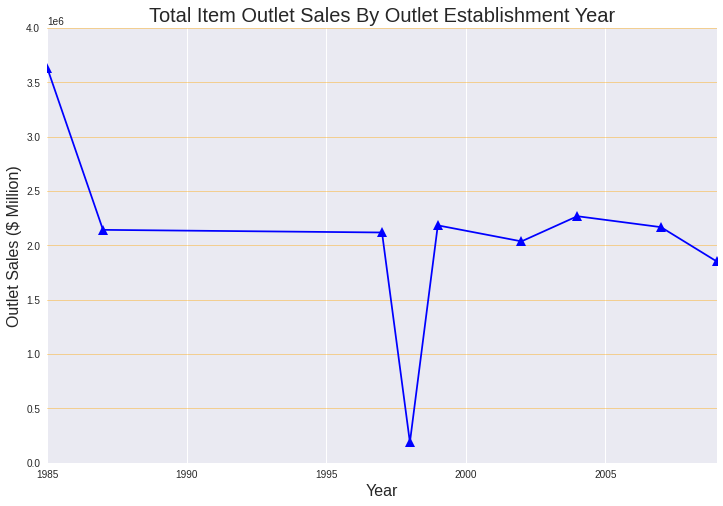

In [ ]:
# Use Matlab-style to perform the lineplot visualization process for outlet sales.
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(year, sales, c= 'blue', marker = '^', markersize = 10)
plt.xlim(left=1985,right=2009)
plt.ylim(bottom=0,top=4000000)
plt.grid(axis = 'y',
         c = 'orange', 
         alpha = .4,
         linestyle = '-')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Outlet Sales ($ Million)', fontsize = 16)
plt.title('Total Item Outlet Sales By Outlet Establishment Year', fontsize = 20)

- Based on what I am observing, it seems that the total item outlet sales are fairly consistent on an establishment year by year basis, but the one year that seems to be a huge outlier would be 1998.
- Maybe there were not a lot of outlets established that year, or maybe that year was not an optimal year in terms of item sales.
- Nevertheless, more information may need to be obtained in regards to what could have caused a major dip in sales for that specific year.

## **Creating a Scatterplot Showing Item Outlet Sales Based on Item Visibility**

- I would like to create a scatterplot of the data that shows how item visibility affects the sale values of the item.
- As always, lets prepare the arrays needed to perform the scatterplot plotting.

In [ ]:
# Create a couple of arrays that will allow us to create the scatterplot.
visibility = df_clean['Item_Visibility'].values
sales = df_clean['Item_Outlet_Sales'].values

In [ ]:
# Let's examine what outlet types lie within the column.
df_clean['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

- Now that I have the data values prepared, let's use Seaborn to perform the visualiation process for plotting item outlet sales against item visibility.

Text(0.5, 1.0, 'Distribution of Item Sales vs Visibility by Outlet Type')

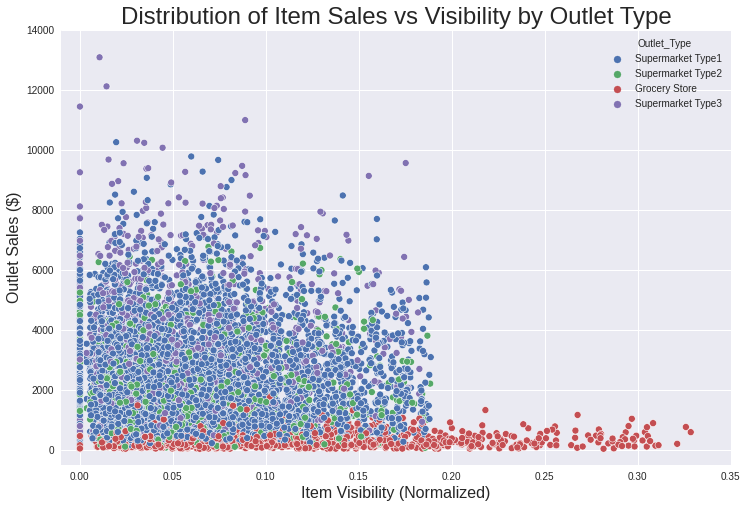

In [ ]:
# Use Seaborn to perform the scatterplot visualization process for outlet sales.
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_clean, x='Item_Visibility', y='Item_Outlet_Sales', hue= 'Outlet_Type')
plt.xlim(left=-0.01,right=0.35)
plt.ylim(bottom=-500,top=14000)
plt.xlabel('Item Visibility (Normalized)', fontsize = 16)
plt.ylabel('Outlet Sales ($)', fontsize = 16)
plt.title('Distribution of Item Sales vs Visibility by Outlet Type', fontsize = 24)

- Based on the scatterplot, it seems that there is somewhat of an inverse relationship between item visibility and outlet sales of each item.
- This is justifiable, as the more expensive the item is, the less visible and the lesser inventory the item is.
- Grocery stores tend to have the highest distribution of visibility values, due to the nature of how the items are sold and made available to the consumers(food items tend to sell at lower costs in general).
- On the other hand, it looks like the supermarket types tend to have the greatest distribution of outlet sale values also due in part to the nature of the item sales (merchandise and bulk items, as well as appliances and electronics may contribute to this). Bulk grocery items could also fall into the same scenario as well.
- I believe one way to improve upon the item sales is to increase the variety of items sold at grocery stores. Since item visibility does not seem to play a major role in altering the value of items sold at grocery stores, by doing so, it may help lower item visibility of other items a bit, which may slightly increase the value at which each grocery store item is sold (consumers have the power of more choices).
- The same could also be applied to supermarkets, but it may be more difficult to do so due to the already high variety of items in supermarkets. It may be more appropriate to phase out items with minimal visibility or promote those same items as part of a sale to increase quantities of those items sold.

# **Data Modeling Preparation**

## **Overview**

- Now that we have a general idea of how our data looks and is visualized after the cleaning process, what would happen if we wanted to prepare our dataset for machine learning? We can definitely make it possible!
- For the purpose of preparing our dataset for machine learning and avoiding any data leakage of our model predictions, we will revert back to the original dataset prior to the data cleaning process.
- Let's examine the original dataset and see what we originally had.

In [ ]:
# Let's get an overview of the original uncleaned dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Obviously, let's check for any duplicated entries before any further analysis.

In [ ]:
# Checks if there are any duplicated entries.
df.duplicated().sum()

0

- No duplicate entries, so that's good.
- Let's see where our missing entries lie.

In [ ]:
# Checks columns for missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## **Identifying Features of the Dataset**

- So far, we see missing values in the Item_Weight and Outlet_Size columns.
- Before we delve into this, let's define what our ordinal, nominal, and numeric features are.
  - Numeric Features: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales
  - Ordinal Features: Outlet_Size
  - Nominal Features: Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type
- Note that Item_Identifier, Outlet_Identifier, and Outlet_Establishment_Year are not really considered features. Item and outlet identifier numbers don't really provide any useful information in data aggregation for the dataset, and outlet establishment year is a date format and does not contribute much at all to model fitting with respect to item sales.

## **Ordinal Encoding**

- Let's attempt to ordinal encode the outlet size column to numeric values prior to validation splitting.

In [ ]:
# Obtain the value counts of the Outlet_Size column.
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Obtain the unique values of the Outlet_Size column.
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

- Since there is no way to replace the nan values with 'Missing' and be able to fit this feature as ordinal prior to validation splitting, we would have no choice but to perform the ordinal encoding process after the validation split for the purpose of model fitting.

## **Validation Splitting**

- Based on the task at hand, we will assign the Item_Outlet_Sales column as the target vector, and the remainder of the aforementioned columns as the feature matrix.
- We will not include the identifiers and date information in the feature matrix.
- Let's go ahead and perform our validation split using random state 42 for consistency purposes.

In [ ]:
# Perform the validation split of the cereals dataset.
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'])
y = df['Item_Outlet_Sales']
# Let's perform the validation split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Let's check the features matrix to see what columns are included.
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Let's verify that the target variable y is the Item_Outlet_Sales.
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## **Instantiation Process**

- To prepare for model fitting, let's go ahead and start the instantiation process of our selectors and transformers.
- First off, lets instantiate our column selectors and the specific columns for certain imputation processes.

In [ ]:
# Instantiate the selectors for categorical and numeric columns accordingly.
ordinal_col = ['Outlet_Size']
nominal_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
num_selector = make_column_selector(dtype_include='number')

- Next, lets instantiate our imputers.
- For numeric features, I plan on using the mean imputer to fill in the missing values.
- For nominal features, due to the sheer volume of missing values from those columns, I would have to use a constant value as 'Missing' to fill in the missing values.
- For ordinal features, I would use the most frequent value imputer here.

In [ ]:
# Create labels for ordinal encoding of Outlet_Size column.
size_labels = ['Small','Medium','High']
ordered_labels = [size_labels]
ordered_labels

[['Small', 'Medium', 'High']]

In [ ]:
# Instantiate imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
# Instantiate StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
# Instantiate One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Instantiate the OrdinalEncoder
ordinal_enc = OrdinalEncoder(categories=ordered_labels)

- Now that we have our imputers instantiated, it is time to create the pipelines needed to perform the transformation process of our datasets.

In [ ]:
# Create the numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Create the nominal pipeline
nominal_pipe = make_pipeline(missing_imputer, ohe)
nominal_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Create the ordinal pipeline
ordinal_pipe = make_pipeline(freq_imputer, ordinal_enc, scaler2)
ordinal_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

## **Instantiate ColumnTransformer**

- Now that we have the pipelines all instantiated, we can go ahead and create the tuples that will allow us to transform the columns using ColumnTransformer.
- The ColumnTransformer will then be prepared to fit the model onto our data.
- I will set remainder as drop in case any identifier information and date information gets added to the model.

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
nominal_tuple = (nominal_pipe, nominal_col)
ordinal_tuple = (ordinal_pipe, ordinal_col)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, nominal_tuple, ordinal_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a53368190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

## **Data Transformation**

- Let's go ahead and fit the training data onto the pipelines, then perform the data transformations on both the training and testing datasets.
- I have to constantly remind myself: PERFORM FITTING ON TRAINING DATA ONLY!

In [ ]:
# Perform the pipeline fitting on the training data.
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a53368190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

In [ ]:
# Perform transformations on both training and testing datasets.
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## **Inspect the Results**

- Let's check the processed dataset and see what we come up with!

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 32)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  1.        ,
         0.        ,  0.28737371],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  1.        ,
         0.        ,  0.28737371],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         0.        ,  0.28737371],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
         0.        ,  0.28737371],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
         0.        ,  0.28737371],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
         0.        , -1.38404828]])

- The processed training dataset looks very clean and ready for modeling!

## **Display the NumPy Arrays of Processed Data**

In [ ]:
# Displays the NumPy array for X_train_processed data.
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  1.        ,
         0.        ,  0.28737371],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  1.        ,
         0.        ,  0.28737371],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         0.        ,  0.28737371],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
         0.        ,  0.28737371],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
         0.        ,  0.28737371],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
         0.        , -1.38404828]])

In [ ]:
# Displays the NumPy array for X_test_processed data.
X_test_processed

array([[ 0.33100885, -0.77664625, -0.99881554, ...,  0.        ,
         0.        ,  1.9587957 ],
       [-1.17989246,  0.1003166 , -1.58519423, ...,  0.        ,
         0.        , -1.38404828],
       [ 0.37844688, -0.48299432, -1.59578435, ...,  0.        ,
         0.        ,  0.28737371],
       ...,
       [-1.13957013,  1.21832428,  1.09397975, ...,  0.        ,
         0.        ,  0.28737371],
       [-1.49772727, -0.77809567, -0.36679966, ...,  0.        ,
         0.        ,  0.28737371],
       [ 0.52076098, -0.77976293,  0.11221189, ...,  0.        ,
         0.        ,  0.28737371]])

## **Viewing Transformations in Pandas Dataframe Format**

- Let's change both the training and testing data into Pandas dataframe format for visualization purposes.

In [ ]:
# Show output of the numeric and categorical columns on the transformed training data.
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.817249,-0.712775,1.828109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.287374
1,0.556340,-1.291052,0.603369,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.287374
2,-0.131512,1.813319,0.244541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374
3,-1.169219,-1.004931,-0.952591,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.384048
4,1.528819,-0.965484,-0.336460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.287374


In [ ]:
# Show output of the numeric and categorical columns on the transformed testing data.
X_test_df = pd.DataFrame(X_test_processed)
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,3.310089e-01,-0.776646,-0.998816,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.958796
1,-1.179892e+00,0.100317,-1.585194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.384048
2,3.784469e-01,-0.482994,-1.595784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374
3,4.213344e-16,-0.415440,0.506592,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.287374
4,-6.426567e-01,-1.047426,0.886725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.384048


# **Machine Learning & Regression Modeling**

- Now that we actually have our pipelines necessary for preprocessing of data for use in machine learning, let's explore the many different types of regression models that help us to figure out what fits the dataset best via training data.

## **Linear Regression Modeling**

### **Model Fitting**

- First off, let's use linear regression modeling on the dataset and see how well the fit is.
- Let's first instantiate the LinearRegression process, then create a pipeline that connects both the preprocessing and the LinearRegression processes together.

In [ ]:
# Instantiates LinearRegression into Python.
lin_reg = LinearRegression()

In [ ]:
# Combine the Preprocessor pipeline and LinearRegression together into reg_pipe.
linreg_pipe = make_pipeline(preprocessor, lin_reg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a53368190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='const...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('linearregression', LinearRegression())])

- We will then fit the regression pipeline onto the training data.
- Reminder that the fit ONLY occurs on training data, NEVER on testing data!

In [ ]:
# Fit the pipeline onto the training data.
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a53368190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='const...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('linearregression', LinearRegression())])

### **Model Analysis**

- Now that we have the linear regression modeling fit onto our transformed data, let's get some statistical information about the linear regression model.
- First, let's obtain our predicted y values for both the training and test datasets.

In [ ]:
# Obtain predictions for both the training and test datasets for linear regression modeling.
linreg_train_preds = linreg_pipe.predict(X_train)
linreg_test_preds = linreg_pipe.predict(X_test)

- Next, let's obtain our R^2 (Coefficient of Determination) scores for both the training data and testing data.

In [ ]:
# Linear regression values.
# Get the R^2 (Coefficient of Determination) score on training data.
linreg_train_score = linreg_pipe.score(X_train, y_train)
# Get the R^2 (Coefficient of Determination) score on test data.
linreg_test_score = linreg_pipe.score(X_test, y_test)
# Print out the score information.
print("R^2 scores for Linear Regression Model:")
print("Training:", linreg_train_score)
print("Test", linreg_test_score)

R^2 scores for Linear Regression Model:
Training: 0.5606867811932243
Test 0.5657166564293133


- Based on the R^2 scores of the linear regression model for both the training and test data, it looks like the scores are very similar to each other, signifying that the model was not overfit onto the overall data.
- Overall, about 56% of the variance is explained by our overall dataset.
- Next, let's obtain our RMSE (root mean squared error) values for the training and test datasets.

In [ ]:
# Obtain the root mean squared error of the training dataset.
linreg_rmse_train = np.sqrt(mean_squared_error(y_train, linreg_train_preds))
linreg_rmse_train

1140.2315604611356

In [ ]:
# Obtain the root mean squared error of the test dataset.
linreg_rmse_test = np.sqrt(mean_squared_error(y_test, linreg_test_preds))
linreg_rmse_test

1094.6131195012504

- The RMSE values are similar in both datasets.
- Overall, this regression model did a sufficient job of fitting the dataset points based on a sloped line, as well as properly fit the training data for analysis on the test data.
- Let's see what values of the Item_Outlet_Sales column we have overall from the training and test datasets.

In [ ]:
# Show descriptive statistics for the item sales values in the training dataset.
y_train.describe()

count     6392.000000
mean      2209.979357
std       1720.441446
min         33.290000
25%        856.884600
50%       1808.978600
75%       3136.250900
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Show descriptive statistics for the item sales values in the test dataset.
y_test.describe()

count     2131.000000
mean      2095.231046
std       1661.406808
min         33.290000
25%        772.993800
50%       1737.738000
75%       2986.113000
max      10236.675000
Name: Item_Outlet_Sales, dtype: float64

- As the R^2 values and RMSE values confirm, it does seem like there is a lot of bias in the regression model, signifying that the linear regression model did a fair job in predictions of the item sales values.
- However, this may not be the most ideal model for machine learning. Maybe we can do better with regression tree modeling?

## **Regression Tree Modeling**

### **Model Fitting**

- In the previous linear regression model, we obtained average R^2 values of 0.56 and average RMSE values of around 1120.
- Let's try regression tree modeling and see how our results change.
- We will need to instantiate DecisionTreeRegressor using random state of 42 for reproducibility of modeling results.

In [ ]:
# Instantiates DecisionTreeRegressor with random state of 42 for consistency.
dec_tree = DecisionTreeRegressor(random_state = 42)

- Let's create the pipeline for the regression tree that will help us perform modeling on the dataset.

In [ ]:
# Create a pipeline for regression tree modeling.
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

- Now that we have the pipeline set, let's perform the regression fitting over the training dataset.

In [ ]:
# Fits the decision tree model over the training data.
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0a53368190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='const...
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

### **Model Analysis**
- Let's go ahead and predict the item sale values for the training and test datasets using regression tree modeling.

In [ ]:
# Predict the target values for the training and test data for regression tree modeling.
dectree_train_preds = dec_tree_pipe.predict(X_train)
dectree_test_preds = dec_tree_pipe.predict(X_test)

In [ ]:
# Regression tree modeling values.
# Get the R^2 (Coefficient of Determination) score on training data.
dectree_train_score = dec_tree_pipe.score(X_train, y_train)
# Get the R^2 (Coefficient of Determination) score on test data.
dectree_test_score = dec_tree_pipe.score(X_test, y_test)
# Print out the score information.
print("R^2 scores for Linear Regression Model:")
print("Training:", dectree_train_score)
print("Test", dectree_test_score)

R^2 scores for Linear Regression Model:
Training: 1.0
Test 0.14959345249220102


- Looks like the regression tree model was WAY overfit based on the R^2 scores.
- Therefore, this model has very strong variance in predictions of item sale values.
- What about the RMSE values? Hmm.....

In [ ]:
# Obtain the root mean squared error of the training dataset.
dectree_rmse_train = np.sqrt(mean_squared_error(y_train, dectree_train_preds))
dectree_rmse_train

4.925864104892086e-15

In [ ]:
# Obtain the root mean squared error of the test dataset.
dectree_rmse_test = np.sqrt(mean_squared_error(y_test, dectree_test_preds))
dectree_rmse_test

1531.7481352938178

- HUGE difference in the values. While the training dataset has been fit extremely well in terms of regression tree modeling, it does a terrible job in projecting the model onto test data.

## **Linear Regression vs Regression Tree Modeling: Which Is Better?**

- Summary of Linear Regression Modeling:
  - R^2 values:
    - Training dataset: ~ 0.560
    - Test dataset: ~ 0.565
  - RMSE values:
    - Training dataset: ~ 1140.231
    - Test dataset: ~ 1094.613

- Summary of Regression Tree Modeling:
  - R^2 values:
    - Training dataset: 1.0
    - Test dataset: ~ 0.149
  - RMSE values:
    - Training dataset: ~ 4.925e-15
    - Test dataset: ~ 1531.748

- In summary, based on the R^2 values and RMSE values described above, I believe that the linear regression did a much better job at making sales predictions in our dataset than regression tree did.
- While the linear regression model was not an excellent fit in modeling, it definitely did a very sufficient job at predicting item sale values on the test data that it receives.